In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')


Menggabungkan semua dataframe ke dalam satu table

In [2]:
retail_table = pd.concat([retail_data1,retail_data2,retail_data3,retail_data4])
retail_table.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price
0,1612885,01-01-19,16293,Malang,Jawa Timur,P1301,BRAND_F,6,747000,4482000
1,1612387,01-01-19,17228,Bogor,Jawa Barat,P2086,BRAND_L,4,590000,2360000
2,1612903,01-01-19,16775,Surakarta,Jawa Tengah,P1656,BRAND_G,3,1325000,3975000
3,1612963,01-01-19,0,unknown,unknown,P3127,BRAND_S,1,1045000,1045000
4,1612915,01-01-19,0,unknown,unknown,P1230,BRAND_E,1,-891000,891000


In [3]:
print('jumlah baris dan kolom',retail_table.shape)

jumlah baris dan kolom (50856, 10)


PENGECEKAN DATAFRAME INFO

In [4]:
retail_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50856 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     50856 non-null  object
 1   order_date   50856 non-null  object
 2   customer_id  50856 non-null  int64 
 3   city         50856 non-null  object
 4   province     50856 non-null  object
 5   product_id   50856 non-null  object
 6   brand        50856 non-null  object
 7   quantity     50856 non-null  int64 
 8   item_price   50856 non-null  int64 
 9   total_price  50856 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 4.3+ MB


PENGECEKAN STATISTIK DESKIRIPTIF

In [5]:
retail_table.describe()

,customer_id,quantity,item_price,total_price
count,50856.000000,50856.000000,5.085600e+04,5.085600e+04
mean,11516.434993,10.504680,1.345225e+06,7.020933e+06
std,6762.130438,41.966574,7.306866e+06,2.689227e+07
min,0.000000,1.000000,-8.910000e+05,-8.910000e+05
25%,12370.000000,1.000000,4.500000e+05,1.356000e+06
50%,14378.000000,4.000000,7.400000e+05,3.536000e+06
75%,16284.000000,11.000000,1.458000e+06,6.270000e+06
max,18287.000000,3114.000000,7.399120e+08,2.326158e+09


TRANSFORMASI DATA

In [6]:
#Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)


item_price < 0 atau total_price < 0:
    order_id order_date  customer_id           city     province product_id  \
4   1612915   01-01-19            0        unknown      unknown      P1230   
96  1612927   01-01-19            0        unknown      unknown      P2736   
21  1697299   01-10-19        17841  Jakarta Utara  DKI Jakarta      P2482   

      brand  quantity  item_price  total_price  
4   BRAND_E         1     -891000       891000  
96  BRAND_P         1     -891000      -891000  
21  BRAND_P         1      520000      -520000  


In [7]:
#Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
  retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

In [8]:
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('data undefined : ',cek)

data undefined :      order_id order_date  customer_id           city     province product_id  \
9  undefined   01-07-19        15150  Jakarta Pusat  DKI Jakarta      P3694   

     brand  quantity  item_price  total_price  
9  BRAND_T        12      159000      1908000  


In [9]:
if cek.shape[0] != 0:
  retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

Transform order_date menjadi datetime pandas

In [10]:
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_11016\2887292536.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])


In [11]:
#      Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())


Info:
<class 'pandas.core.frame.DataFrame'>
Index: 50852 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     50852 non-null  object        
 1   order_date   50852 non-null  datetime64[ns]
 2   customer_id  50852 non-null  int64         
 3   city         50852 non-null  object        
 4   province     50852 non-null  object        
 5   product_id   50852 non-null  object        
 6   brand        50852 non-null  object        
 7   quantity     50852 non-null  int64         
 8   item_price   50852 non-null  int64         
 9   total_price  50852 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 4.3+ MB
None


In [12]:
#      Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())


Statistik deskriptif:
                           order_date   customer_id      quantity  \
count                          50852  50852.000000  50852.000000   
mean   2019-07-23 13:29:35.788562432  11516.692107     10.505211   
min              2019-01-01 00:00:00      0.000000      1.000000   
25%              2019-04-16 00:00:00  12370.000000      1.000000   
50%              2019-08-02 00:00:00  14378.000000      4.000000   
75%              2019-11-01 00:00:00  16284.000000     11.000000   
max              2019-12-31 00:00:00  18287.000000   3114.000000   
std                              NaN   6761.933325     41.968160   

         item_price   total_price  
count  5.085200e+04  5.085200e+04  
mean   1.345353e+06  7.021458e+06  
min    1.200000e+04  1.200000e+04  
25%    4.500000e+05  1.356000e+06  
50%    7.400000e+05  3.536000e+06  
75%    1.458000e+06  6.270000e+06  
max    7.399120e+08  2.326158e+09  
std    7.307137e+06  2.689326e+07  


In [13]:
retail_table['order_id'] = retail_table['order_id'].astype('int64')

In [14]:
retail_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50852 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     50852 non-null  int64         
 1   order_date   50852 non-null  datetime64[ns]
 2   customer_id  50852 non-null  int64         
 3   city         50852 non-null  object        
 4   province     50852 non-null  object        
 5   product_id   50852 non-null  object        
 6   brand        50852 non-null  object        
 7   quantity     50852 non-null  int64         
 8   item_price   50852 non-null  int64         
 9   total_price  50852 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 4.3+ MB


Filter hanya 5 province terbesar di pulau jawa

In [15]:
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

In [16]:
print(retail_table['province'].unique())

['Jawa Timur' 'Jawa Barat' 'Jawa Tengah' 'Yogyakarta' 'DKI Jakarta']


In [17]:
group_by_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})

 Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'

In [18]:
group_by_city_province.columns = ['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):\n', group_by_city_province.head(10))


groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     21        20       40     16   357607000
           Jawa Barat       6         6       21      9    94335000
           Jawa Tengah      3         3       19     11    53933000
           Jawa Timur       3         3        9      9    69116000
           Yogyakarta       4         3       10      6  2884114000
2019-01-02 DKI Jakarta     10        10       28     14   149577000
           Jawa Barat       7         7       26     11   172395000
           Jawa Tengah      1         1        2      2    13760000
           Jawa Timur       2         2        3      2    92570000
           Yogyakarta       1         1        6      4   122160000


Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column


In [19]:
unstack_city_province = group_by_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())


unstack_city_province (5 data teratas):
                  order                                               \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta   
order_date                                                            
2019-01-01        21.0        6.0         3.0        3.0        4.0   
2019-01-02        10.0        7.0         1.0        2.0        1.0   
2019-01-03         9.0        2.0         8.0        4.0        3.0   
2019-01-04        18.0        5.0         5.0        0.0        4.0   
2019-01-05        13.0        7.0         2.0        2.0        2.0   

              customer                                               ...  \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta  ...   
order_date                                                           ...   
2019-01-01        20.0        6.0         3.0        3.0        3.0  ...   
2019-01-02        10.0        7.0         1.0        2.0        1.0  ...   
2019-01-0

Slicing data untuk masing-masing measurement, misal: order

In [20]:
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         21.0         6.0          3.0         3.0         4.0
2019-01-02         10.0         7.0          1.0         2.0         1.0
2019-01-03          9.0         2.0          8.0         4.0         3.0
2019-01-04         18.0         5.0          5.0         0.0         4.0
2019-01-05         13.0         7.0          2.0         2.0         2.0


Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan

In [21]:
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    14.052632    5.684211     2.631579    2.210526    3.052632
2019-02-28    17.043478    5.956522     2.043478    2.652174    3.130435
2019-03-31    18.259259    5.296296     2.555556    2.777778    2.703704
2019-04-30    18.269231    6.653846     3.153846    2.538462    2.807692
2019-05-31    19.136364    6.863636     2.590909    3.363636    3.727273


Plot untuk hasil by_order_monthly

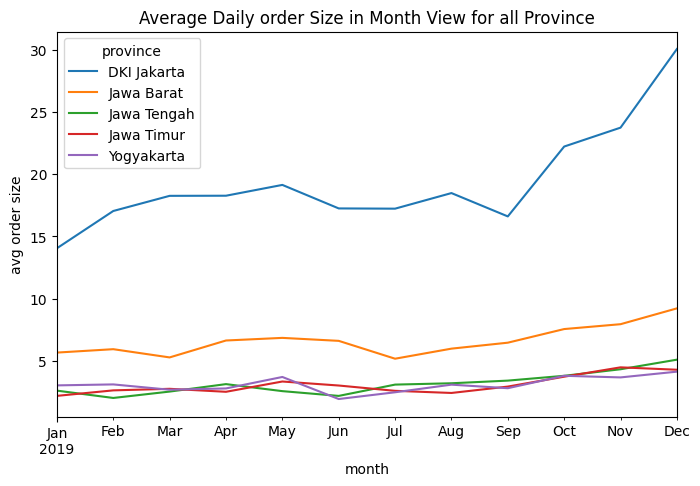

In [24]:
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for all Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()